# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features: 
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes representing class label of iris flower {1,2,3} 
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica


# STEP #1: IMPORTING LIBRARIES AND DATA 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
dataset=pd.read_csv('Iris.csv')

# STEP #2: EXPLORING THE DATASET  

In [34]:
# Let's view the head of the training dataset
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# Let's view the last elements in the training dataset
dataset.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [36]:
dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

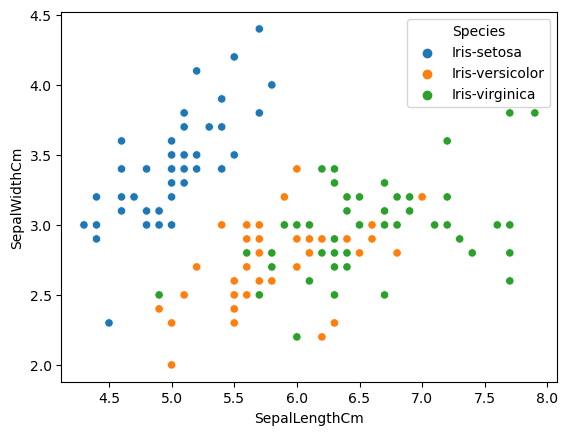

In [37]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=dataset)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

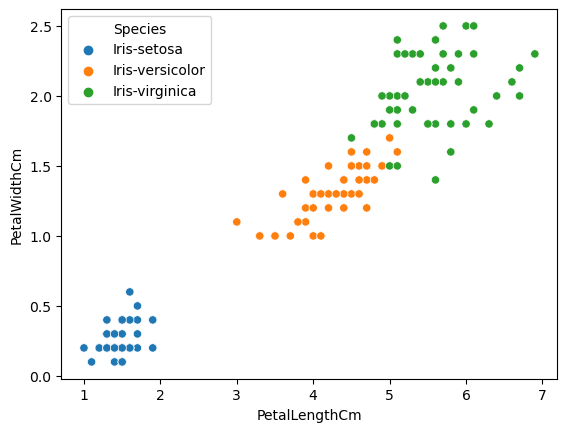

In [38]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=dataset)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

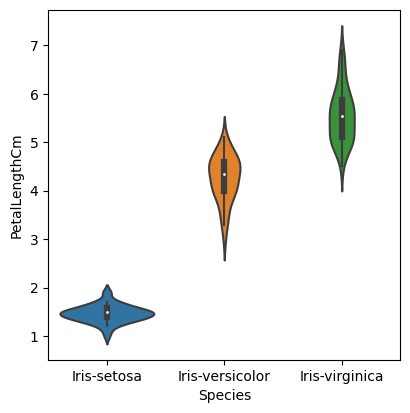

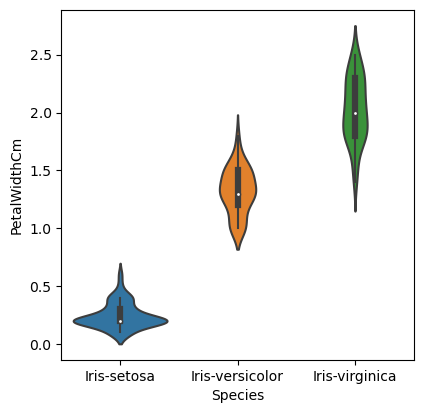

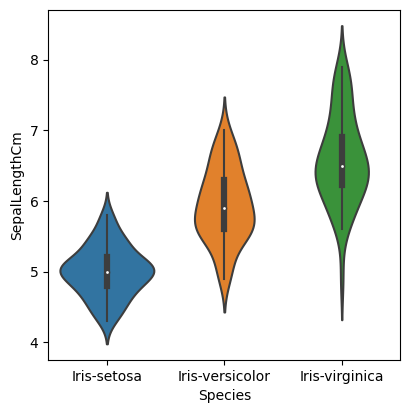

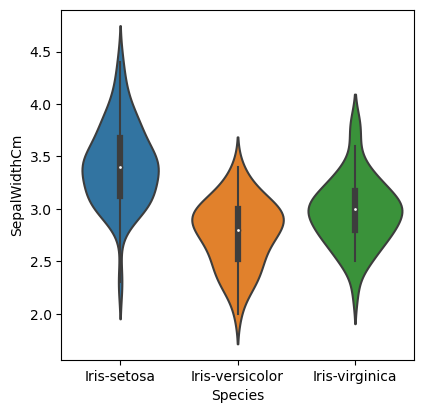

In [39]:
# Let's show the Violin plot 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=dataset)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalWidthCm',data=dataset)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=dataset)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalWidthCm',data=dataset)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

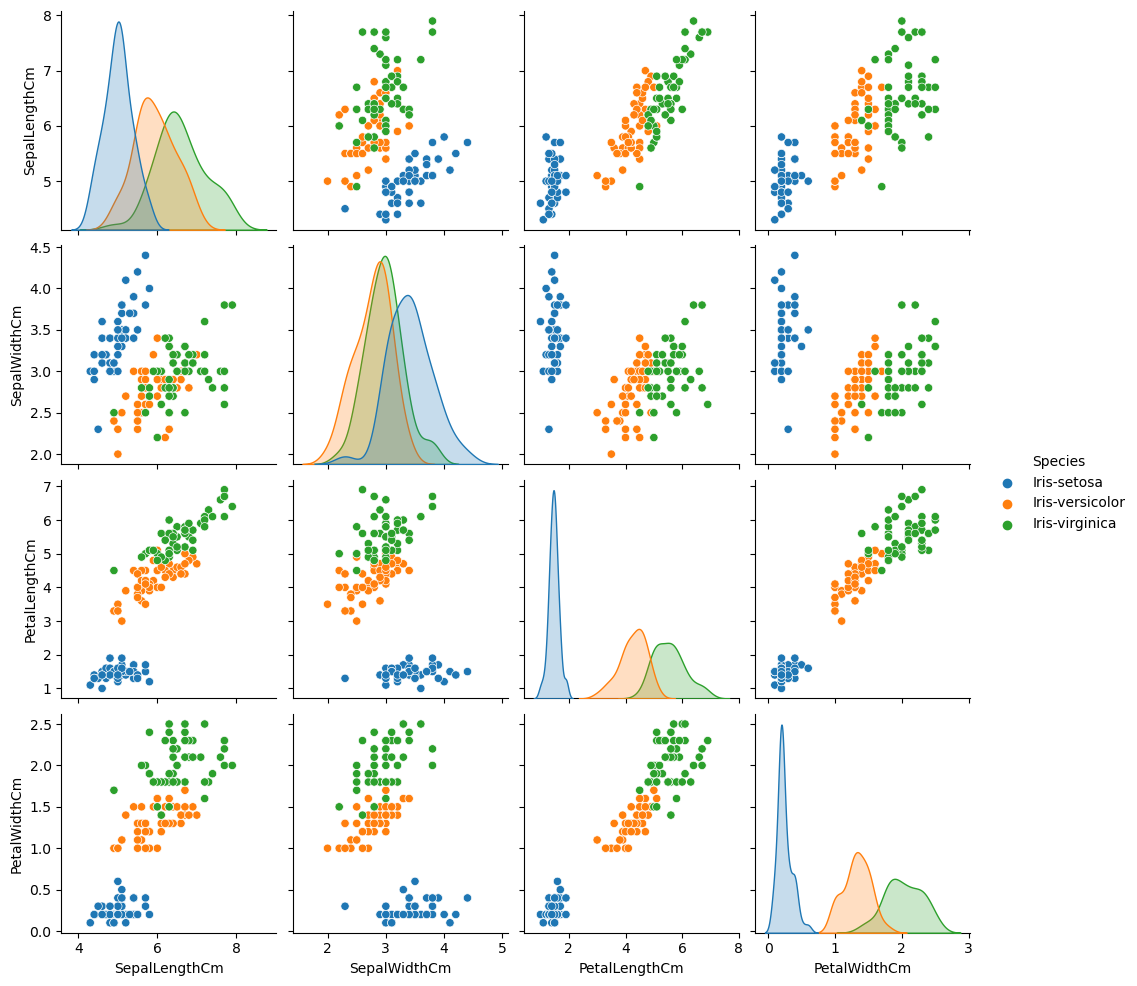

In [40]:
# Let's try the Seaborn pairplot
sns.pairplot(dataset,hue='Species')

<Axes: >

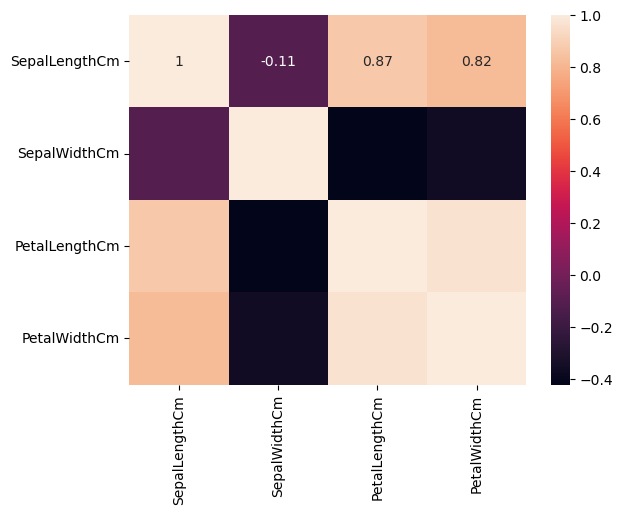

In [41]:
# Let's check the correlation between the variables 
sns.heatmap(dataset.drop('Species', axis=1).corr(),annot=True)


# STEP #3: DATA CLEANING

In [42]:
# Let's drop the ID and Species (target label) coloumns
X=dataset.drop(['Species'], axis=1)

In [43]:
y=dataset['Species']

In [46]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [48]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [56]:
X_train.shape,X_test.shape

((120, 4), (30, 4))

# STEP #4: TRAINING THE MODEL

In [57]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

# STEP #5: EVALUATING THE MODEL

In [62]:
y_pred=classifier.predict(X_test)

In [64]:
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [65]:
y_test

101     Iris-virginica
105     Iris-virginica
39         Iris-setosa
70     Iris-versicolor
61     Iris-versicolor
77     Iris-versicolor
97     Iris-versicolor
26         Iris-setosa
23         Iris-setosa
137     Iris-virginica
46         Iris-setosa
113     Iris-virginica
118     Iris-virginica
41         Iris-setosa
127     Iris-virginica
109     Iris-virginica
25         Iris-setosa
102     Iris-virginica
85     Iris-versicolor
79     Iris-versicolor
76     Iris-versicolor
108     Iris-virginica
134     Iris-virginica
59     Iris-versicolor
48         Iris-setosa
136     Iris-virginica
68     Iris-versicolor
5          Iris-setosa
11         Iris-setosa
86     Iris-versicolor
Name: Species, dtype: object

<Axes: >

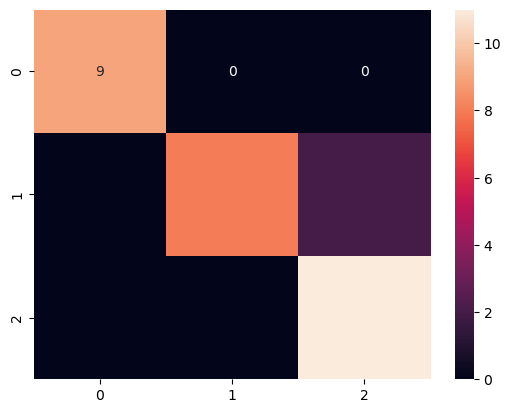

In [66]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [68]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.94        30
   weighted avg       0.94      0.93      0.93        30

